In [36]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout


from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [26]:
## loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Splitting Of DataSet and Printing the Values

In [3]:
x_train.shape , y_train.shape ,x_test.shape ,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [27]:
## splitting the dataset into training and testing
print('X_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


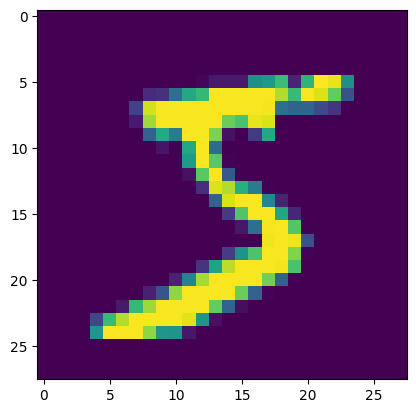

In [28]:
plt.imshow( x_train[0])

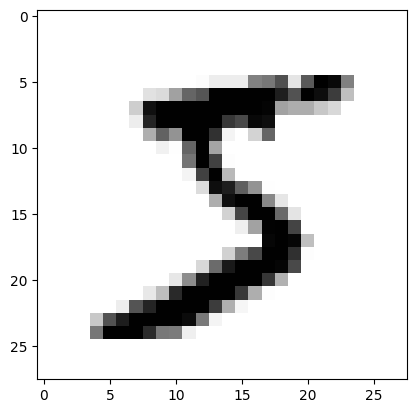

In [4]:
plt.imshow(x_train[0],cmap='binary')

In [37]:
### plotting the mnist dataset using matlab

def plot_input_img(i):
    plt.imshow(x_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

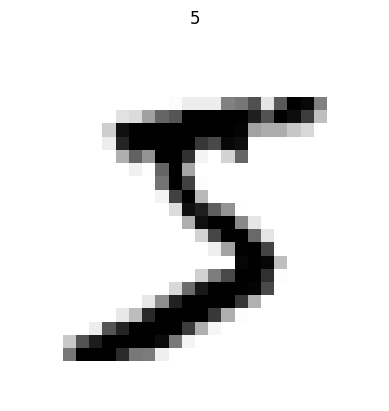

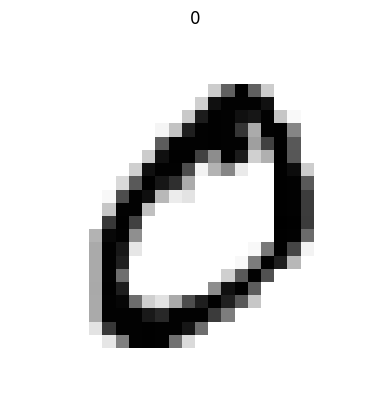

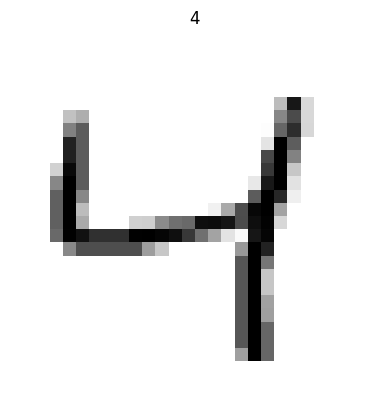

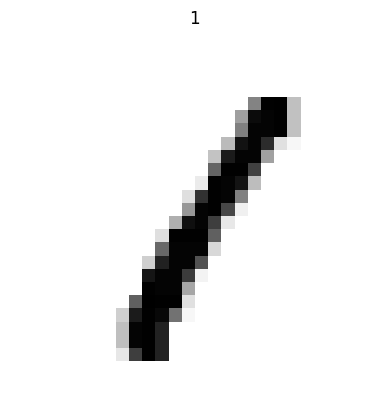

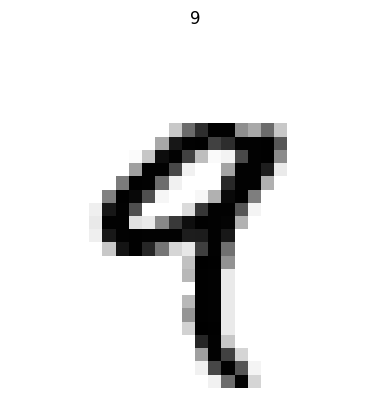

In [38]:
for i in range(5):
    plot_input_img(i)

# Data Pre-Processing

# 1. Normalisation

In [39]:
#pre process the images
#normalizing the image to [0,1] range

x_train = x_train.astype(np.float32)/225
x_test = x_test.astype(np.float32)/225

# 2. Re-Shaping of Dataset

In [40]:
#reshape or expand the dimentions of images to (28,28,1)


x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test, -1)

# 3. One-Hot Encoding

In [41]:
#convert classes to one hot vectors

y_train = keras.utils.to_categorical(y_train)

In [42]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [43]:
y_test = keras.utils.to_categorical(y_test)

# 4. Data-Augmentation

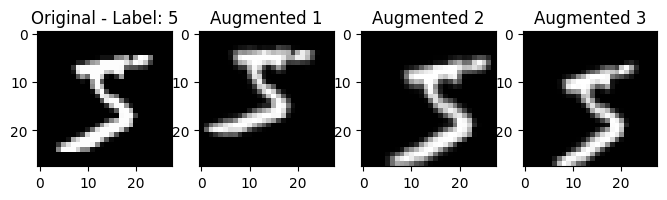

In [44]:
#Data augmentation helps create variations of your training data, making your model more robust and less prone to overfitting.

datagen = ImageDataGenerator(
    rotation_range=10,          # Randomly rotate images up to 10 degrees
    width_shift_range=0.1,     # Randomly shift images horizontally
    height_shift_range=0.1,    # Randomly shift images vertically
    shear_range=0.2,           # Shear transformations
    zoom_range=0.1,            # Randomly zoom images
    horizontal_flip=False,     # Randomly flip images horizontally
    vertical_flip=False,       # Randomly flip images vertically
    fill_mode='nearest'        # Fill in newly created pixels with the nearest existing pixel
)

# Example of applying data augmentation to one image
sample_image = x_train[0]
sample_label = y_train[0]
plt.figure(figsize=(8, 8))
plt.subplot(1, 4, 1)
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Original - Label: {np.argmax(sample_label)}")

# Apply data augmentation
augmented_images = []
for i in range(3):
    augmented_image = datagen.random_transform(sample_image)
    augmented_images.append(augmented_image)
    plt.subplot(1, 4, i + 2)
    plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
    plt.title(f"Augmented {i+1}")

plt.show()

 # 5. Gaussian Blur


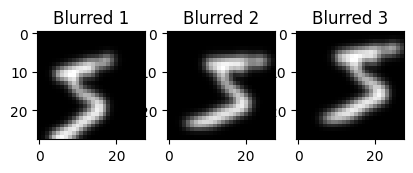

In [45]:
#Apply Gaussian blur to reduce noise and make the images smoother

from scipy.ndimage import gaussian_filter

# Example of applying Gaussian blur to one image
blurred_images = []
for i in range(3):
    augmented_image = datagen.random_transform(sample_image)
    blurred_image = gaussian_filter(augmented_image, sigma=1)
    blurred_images.append(blurred_image)
    plt.subplot(1, 4, i + 2)
    plt.imshow(blurred_image.reshape(28, 28), cmap='gray')
    plt.title(f"Blurred {i+1}")


USE OF CNN MODEL

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32,(3,3), input_shape = (28,28,1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

In [14]:
model.add(Conv2D(64,(3,3), activation= 'relu'))
model.add(MaxPool2D((2,2)))

In [15]:
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [17]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

# MODEL TRAINING

In [20]:
# Earlystopping
es = EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)

In [21]:
# Model check point
mc = ModelCheckpoint("./bestmodel.h5", monitor='val_acc', verbose=1, save_best_only= True)
cb =[es,mc]

In [22]:
his =model.fit(x_train, y_train, epochs=50, validation_split=0.3,callbacks=cb)

Epoch 1/50
1313/1313 [==============================] - 34s 23ms/step - loss: 0.2034 - accuracy: 0.9398 - val_loss: 0.0743 - val_accuracy: 0.9775
Epoch 2/50
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0708 - accuracy: 0.9783 - val_loss: 0.0603 - val_accuracy: 0.9820
Epoch 3/50
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.0543 - val_accuracy: 0.9837
Epoch 4/50
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0472 - val_accuracy: 0.9853
Epoch 5/50
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.0484 - val_accuracy: 0.9853
Epoch 6/50
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0505 - val_accuracy: 0.9844
Epoch 7/50
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.0390 -

In [23]:
model_S = keras.models.load_model=(r"C://Users//Smriti//Desktop//Ml_Doodling//bestmodel.h5")

In [24]:
score = model.evaluate(x_test,y_test)

print(f"the model accuracy is {score[1]}")

313/313 [==============================] - 3s 10ms/step - loss: 0.0446 - accuracy: 0.9927
the model accuracy is 0.9926999807357788


In [25]:
model.save('bestmodel.h5')

c:\Users\Smriti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
